In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from gan import gan as GAN
gan = GAN(100, 0.1)
gan.dist_init('mu', 0, 5)
gan.data_init(1000, 3)
gan.model_init()
gan.optimizer_init(1, 0.5, 0.95, 1e-3, 3e-5, 1, 1, False, 0.1)
gan.fit(10000, 1e-7, True)

100%|██████████| 10000/10000 [07:04<00:00, 23.57it/s]


(-1.5, 1.5)

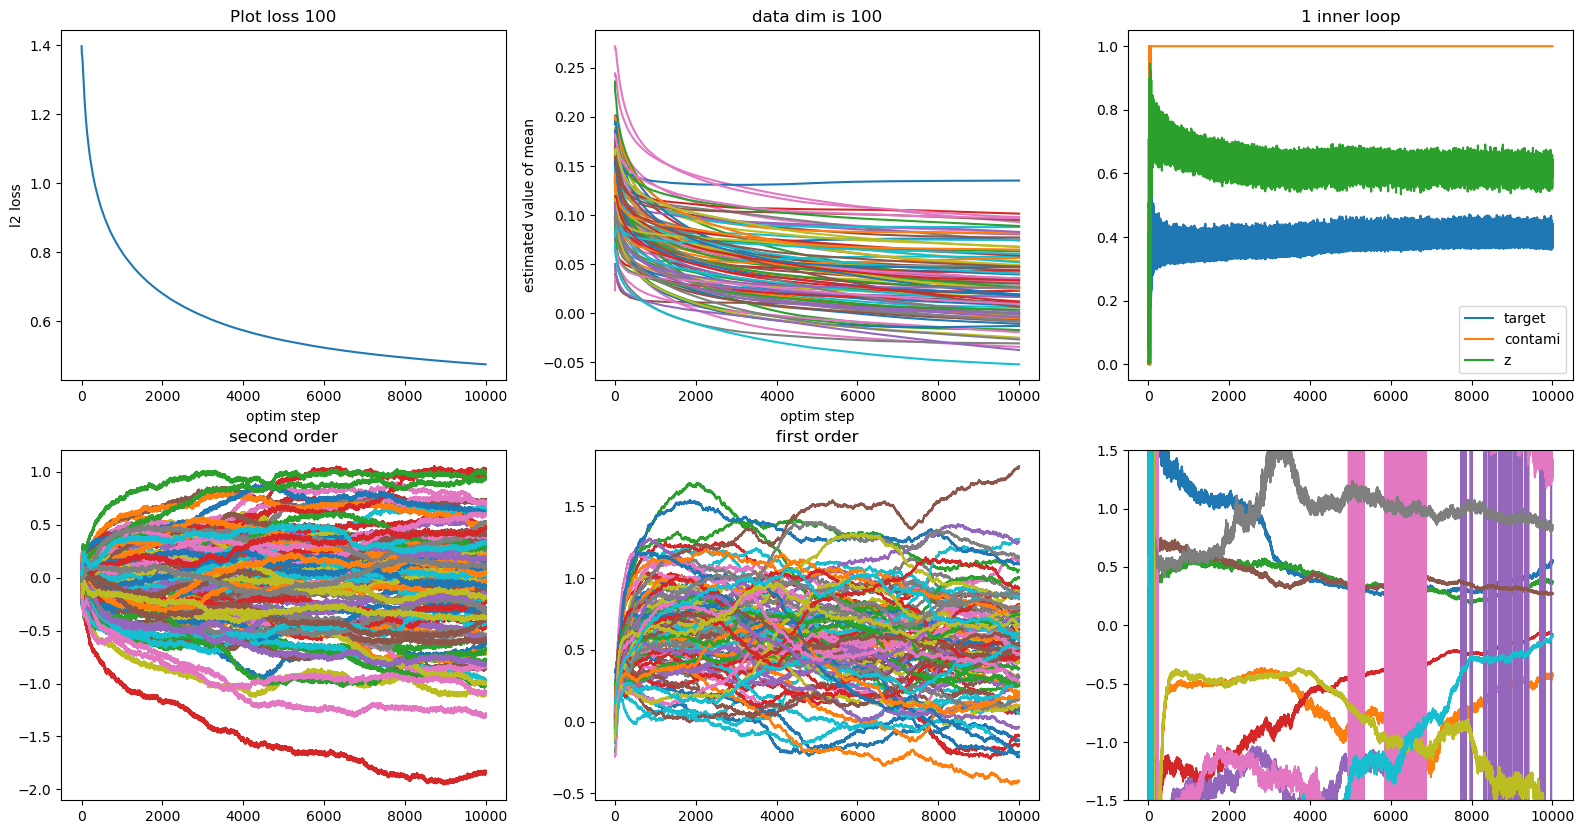

In [28]:
col_num = 3
row_num = 2
plt.figure(figsize=(6.5 * col_num, 5 * row_num))
plt.subplot(row_num, col_num, 1)
plt.plot(gan.l2_loss)
plt.xlabel('optim step')
plt.ylabel('l2 loss')
plt.title(f'Plot loss {gan.data_dim}')
plt.subplot(row_num, col_num, 2)
# for mean in gan.emperical_true_mean:
#     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
plt.plot(np.array(gan.G_record))
plt.xlabel('optim step')
plt.ylabel('estimated value of mean')
plt.title(f'data dim is {gan.data_dim}')
# plt.legend()
plt.subplot(row_num, col_num, 3)
plt.plot(gan.D_data_record, label='target')
plt.plot(gan.D_contami_record,label='contami')
plt.plot(gan.D_z_record, label='z')
plt.title(f'{gan.update_D_iter} inner loop')
plt.legend()

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.D_record)[:,:gan.data_dim]);
plt.title('second order')
plt.subplot(row_num, col_num, 5)
plt.plot(np.array(gan.D_record)[:,gan.data_dim:]);
plt.title('first order')
D_rec = np.array(gan.D_record)
plt.subplot(row_num, col_num, 6)
vertex = - 0.5 * D_rec[:, gan.data_dim:] / D_rec[:, :gan.data_dim]
vertex = vertex[:, :10]
plt.plot(vertex)
plt.ylim(-1.5, 1.5)